## NGC7753 parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
# observational data
data_cube = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits")
data_header =fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits")
# mask 
data_mask= fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_mask_kms.fits")

In [8]:
data_masked = np.where(data_mask, data_cube, 0)
mom0_map=np.nansum(data_masked, axis=0)*abs(data_header['CDELT3'])*1e-3 # Jy/beam km/s

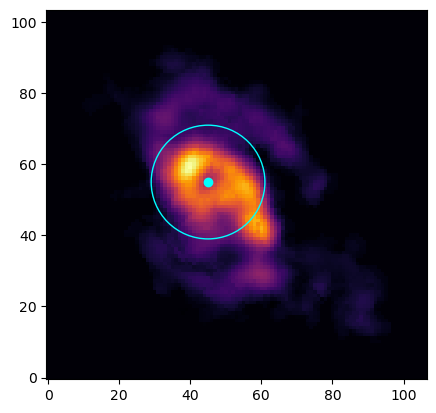

In [17]:
plt.imshow(mom0_map, origin='lower', cmap='inferno')
plt.plot(45,55,"o", color="cyan")
plt.gca().add_patch(plt.Circle((45,55), 16, color="cyan", fill=False))

In [18]:
# Create a binary mask for the circle region on each channel of the data cube

center_x, center_y = 45, 55
radius = 16

nz, ny, nx = data_cube.shape
Y, X = np.ogrid[:ny, :nx]
dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
mask2d = (dist_from_center <= radius).astype(int)

# Expand mask to all channels
mask3d = np.broadcast_to(mask2d, data_cube.shape)

# Apply mask to isolate gas in the circle for all channels
masked_gas_cube = data_cube * mask3d

In [19]:
mom0_newdat=np.nansum(masked_gas_cube, axis=0)*abs(data_header['CDELT3'])*1e-3 # Jy/beam km/s

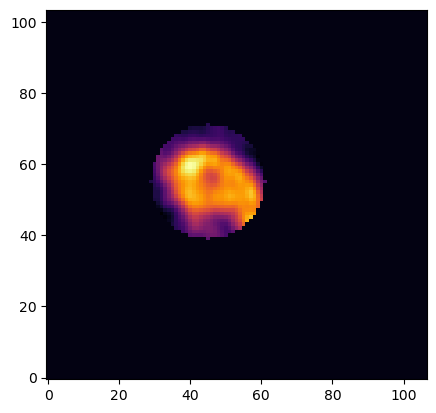

In [20]:
plt.imshow(mom0_newdat, origin='lower', cmap='inferno')

In [21]:
directory="/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/"

In [22]:
hdul_new = fits.PrimaryHDU(masked_gas_cube,header=data_header)
hdul_new.writeto(directory + 'ngc7753_cube1.fits', overwrite=True)